# EDA

за основу взял [1 занятие клуба ии в мифи](https://colab.research.google.com/drive/1V__EuSANRpZLZd5dW2H9Pgvxhllfud1x)

### Загрузим файлы, с которыми будем работать

In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
commit = pd.read_csv("test.csv")

### Выделим категориальные признаки, численные и целевой признак

In [2]:
num_cols = [
    "ClientPeriod",
    "MonthlySpending",
    "TotalSpent",
]

cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

churn = "Churn"

### Проанализируем данные на пустые и некорректные значения

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [4]:
commit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

Заметим, что TotalSpent представлен как object, а IsSeniorCitizen как int. Сделаем замену типов

Заменим все " " на пустые значения

In [5]:
import numpy as np

train.replace(' ', np.nan, inplace=True)
commit.replace(' ', np.nan, inplace=True)

<Axes: >

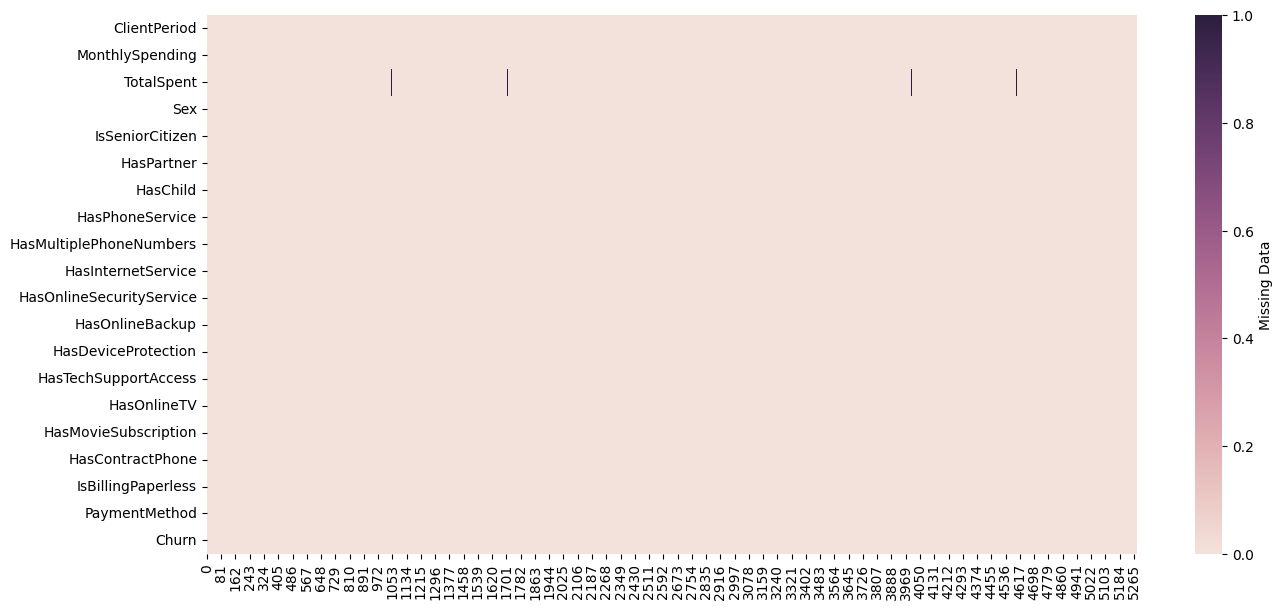

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# График распределения пропущенных значений
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'})

In [7]:
print(train.isna().sum())
print(commit.isna().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64
ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection        


Как мы видим, пустые значения появились в totalspent. Заменим их на нули

In [8]:
train["TotalSpent"] = train["TotalSpent"].replace(np.nan, 0).astype('float')
commit["TotalSpent"] = commit["TotalSpent"].replace(np.nan, 0).astype('float')

In [9]:
print(train.info())
print(commit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Заменим для IsSeniorCitizen 0 на No, 1 на Yes

In [10]:
train.IsSeniorCitizen = train.IsSeniorCitizen.map(lambda x: "Yes" if x == 1 else "No")
commit.IsSeniorCitizen = commit.IsSeniorCitizen.map(lambda x: "Yes" if x == 1 else "No")
print(set(train.IsSeniorCitizen.to_list()))
print(set(commit.IsSeniorCitizen.to_list()))

{'No', 'Yes'}
{'No', 'Yes'}


### Проверим данные на наличие дубликатов

In [11]:
train.duplicated().sum()

14

Получили 26 дублирующих строк. нужно их удалить

In [12]:
train.drop_duplicates(inplace=True)

Теперь посмотрим, будут ли дубликаты, если отбросить целевой признак

In [13]:
train.drop('Churn', axis=1).duplicated().sum()

8

In [14]:
train[train.drop(['Churn'], axis=1).duplicated(keep=False)].sort_values(by=[*train.columns])

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
838,1,19.65,19.65,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4811,1,19.65,19.65,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3463,1,19.75,19.75,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4294,1,19.75,19.75,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3831,1,20.00,20.00,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1647,1,20.00,20.00,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3735,1,20.20,20.20,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3769,1,20.20,20.20,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
881,1,20.40,20.40,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1874,1,20.40,20.40,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1


Осталось 8 дубликатов, при этом на одинаковых наборах признаков дающих разные целевые значения. Так как для нас приоритетнее класс "1", оставим его

In [15]:
train.drop_duplicates(subset=list(train.columns[:-1]), keep='last', inplace=True)

### Анализ числовых признаков

Распределение признаков

In [16]:
train.describe()

,ClientPeriod,MonthlySpending,TotalSpent,Churn
count,5260.000000,5260.000000,5260.000000,5260.000000
mean,32.528327,65.040875,2296.898165,0.260646
std,24.517317,30.153470,2269.107245,0.439029
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.737500,403.300000,0.000000
50%,29.000000,70.500000,1414.900000,0.000000
75%,55.000000,90.050000,3813.712500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [17]:
commit.describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,1761.000000,1761.000000,1761.000000
mean,32.293583,64.272601,2256.483135
std,24.593736,29.832517,2260.501794
min,0.000000,18.550000,0.000000
25%,9.000000,35.650000,405.600000
50%,29.000000,70.050000,1356.300000
75%,56.000000,89.400000,3759.050000
max,72.000000,117.350000,8496.700000


array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

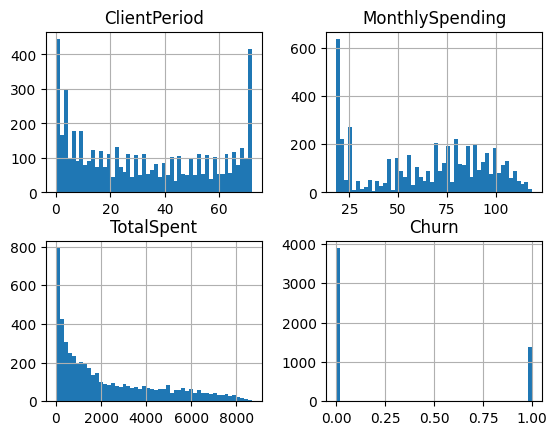

In [18]:
train.hist(bins=50)

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

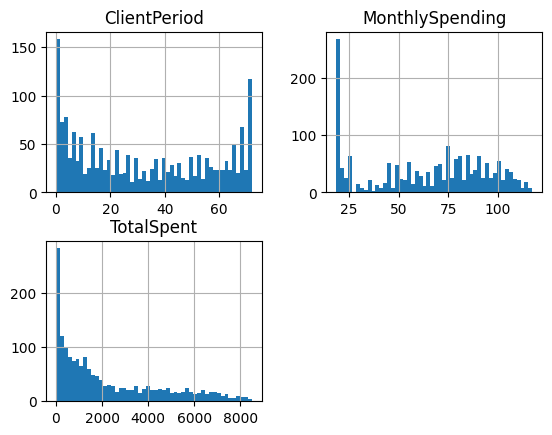

In [19]:
commit.hist(bins=50)

Гистограммы схожи, значит данные провдоподобные и сформированны не предвзято

Попробуем обнаружить взаимосвзязь между численными признаками

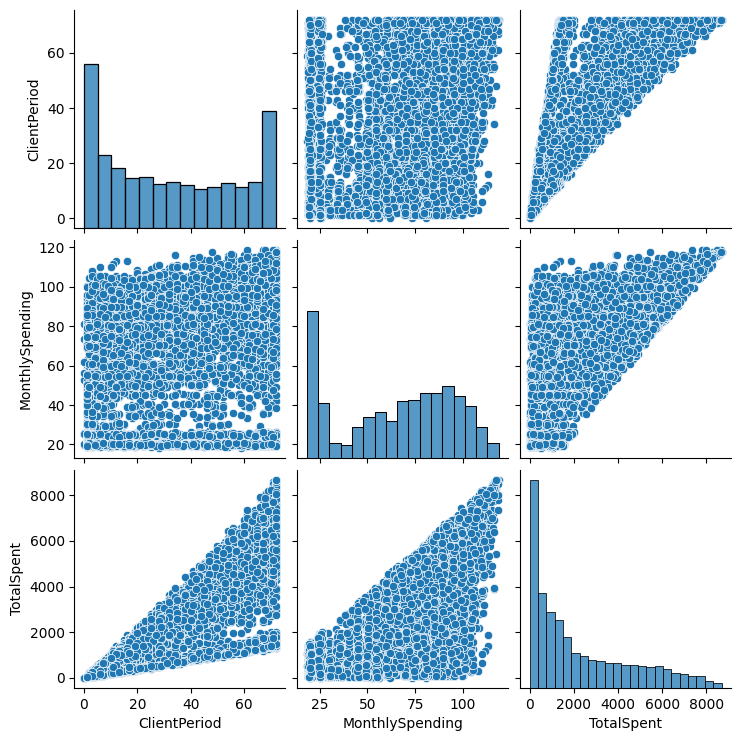

In [20]:
sns.pairplot(train[num_cols])

### Анализ категориальных признаков

Рассмотрим распределение целевой переменной по всем категориальным признакам

C:\Users\bm535\AppData\Local\Temp\ipykernel_16884\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\bm535\AppData\Local\Temp\ipykernel_16884\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\bm535\AppData\Local\Temp\ipykernel_16884\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\bm535\AppData\Local\Temp\ipykernel_16884\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


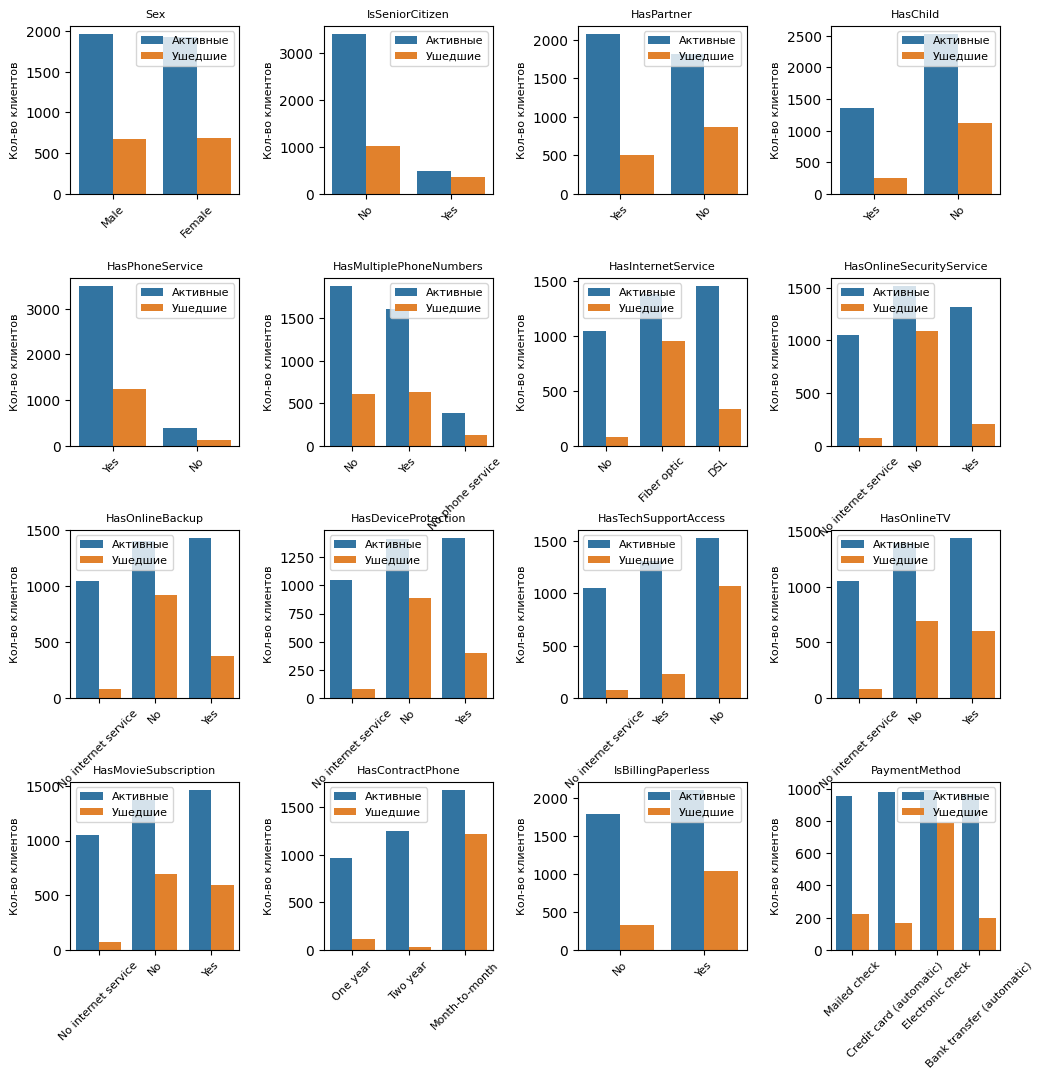

In [21]:
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,  figsize=(12, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column_name in enumerate(cat_cols):
    row = i // nrows
    col = i % ncols
    axis = axes[row, col]
    chart_title = "".join(column_name)
    sns.countplot(train, x=column_name, hue=churn, ax=axis)
    axis.set_title(chart_title, fontsize=8)
    axis.set_xlabel("")
    axis.set_ylabel("Кол-во клиентов", fontsize=8)
    axis.legend(("Активные", "Ушедшие"), fontsize=8)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)


Заметим, что пол не влияет ни на что. уберем его

In [22]:
train.drop("Sex", axis=1, inplace=True)
cat_cols.remove("Sex")
commit.drop("Sex", axis=1, inplace=True)

Для обнаружения корреляций между признаками закодируем категориальные признаки методом labelencoding(чтобы за раз закодировать ordinalencoder)

In [23]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
train_label_encoded = train.copy()
train_label_encoded[cat_cols] = oe.fit_transform(train_label_encoded[cat_cols])

train_label_encoded

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0
1,72,25.85,1872.20,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0
2,1,75.90,75.90,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,1
3,32,79.30,2570.00,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,60,115.25,6758.45,0.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0
5278,50,44.45,2188.45,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0
5279,1,55.05,55.05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,0
5280,29,76.00,2215.25,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0


Построим хитмап для обнаружения корреляций

<Axes: >

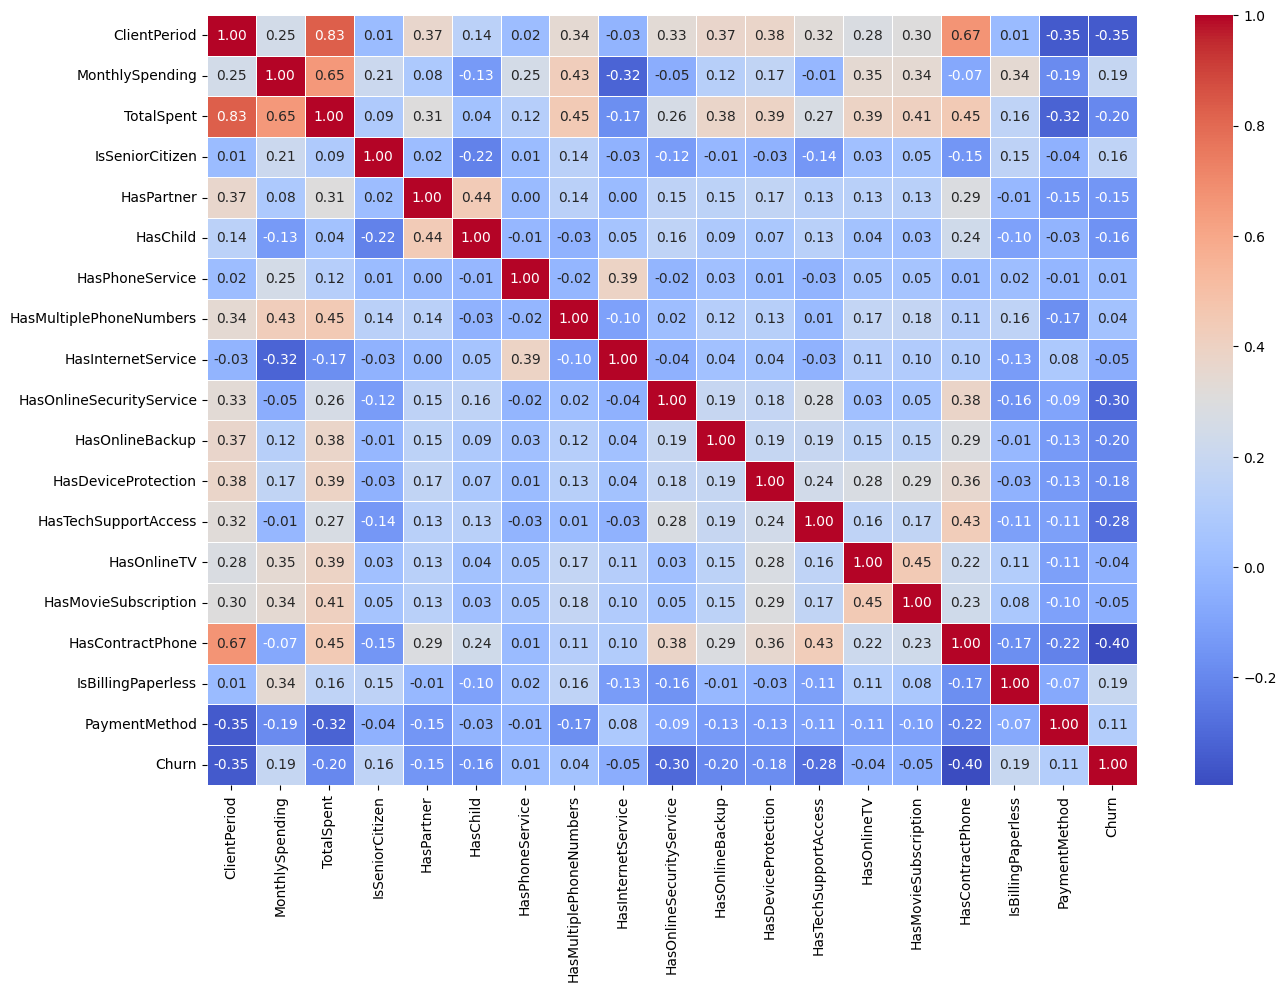

In [24]:
corr_matrix = train_label_encoded.corr()
fig, axes = plt.subplots(figsize=(15, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", ax=axes, linewidth=.5, fmt=".2f")


Как мы видим, TotalSpent зависима от ClientPeriod и MonthlySpending, в меньшей степени от HasContractPhone

Уберем TotalSpent чтобы не допустить мультиколлинеарности

In [25]:
# train.drop("TotalSpent", axis=1, inplace=True)
# num_cols.remove("TotalSpent")
# commit.drop("TotalSpent", axis=1, inplace=True)

Теперь, посмотрим распределение целевого признака 

<Axes: >

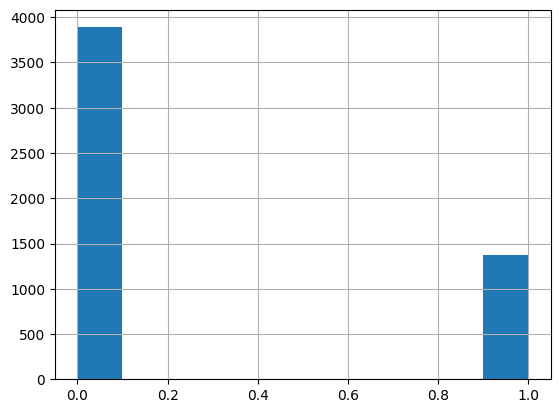

In [26]:
train[churn].hist()

Как мы видим, тут есть дисбаланс классов. Мы его исправим далее

# Подготовка данных для обучения

### Подготовка классов для пайплайнов

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# from imblearn.over_sampling import SMOTE

# #пайп для категориальных признаков
# categorical_pipe = Pipeline(steps=[('ohe', OneHotEncoder(drop="first", handle_unknown="error"))])

# #пайп для численных признаков
# numeric_pipe = Pipeline(steps=[('scaler', StandardScaler())])

# #трансформер колонок
# columns_transformer = ColumnTransformer(
#     transformers=[
#         ("categorical", categorical_pipe, cat_cols),
#         ("numeric", numeric_pipe, num_cols),
#     ])


### Подготовим алгоритмы для нахождения лучших гиперпараметров

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna

from sklearn.metrics import roc_auc_score

### Стандартизируем численные признаки

In [29]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = train.columns[:2]

scaler = StandardScaler()
scaled_vals = scaler.fit_transform(train[cols_to_scale])

scaled_df = pd.DataFrame(scaled_vals, columns=cols_to_scale, index=train.index)

train[cols_to_scale] = scaled_df
train

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0.916650,-1.510447,1026.35,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,1.610104,-1.299837,1872.20,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,-1.286084,0.360163,75.90,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,-0.021551,0.472930,2570.00,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,1.120607,1.665278,6758.45,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.204501,-1.148928,82.15,No,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,0.712694,-0.682934,2188.45,No,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,-1.286084,-0.331366,55.05,No,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,-0.143925,0.363479,2215.25,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [30]:
scaled_vals = scaler.transform(commit[cols_to_scale])

scaled_df = pd.DataFrame(scaled_vals, columns=cols_to_scale, index=commit.index)

commit[cols_to_scale] = scaled_df
commit

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,0.386363,-0.296540,2386.85,No,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,-0.143925,1.109733,3004.15,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,-0.959753,0.371771,684.85,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,1.406147,0.297146,4868.40,No,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,1.569312,-1.490546,1389.60,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,1.569312,1.330293,7555.00,No,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,-0.796587,-1.465671,272.35,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,-1.245292,0.875907,171.45,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,-0.551839,0.797965,1620.80,No,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


### Закодируем с помощью onehot категориальные признаки

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

train_encoded_np = preprocessor.fit_transform(train.drop(columns=["Churn"]))

encoded_feature_names = preprocessor.get_feature_names_out()

train_enc = pd.DataFrame(train_encoded_np, columns=encoded_feature_names,
                             index=train.index)


train_enc["Churn"] = train["Churn"]
train = train_enc

train

,cat__IsSeniorCitizen_No,cat__IsSeniorCitizen_Yes,cat__HasPartner_No,cat__HasPartner_Yes,cat__HasChild_No,cat__HasChild_Yes,cat__HasPhoneService_No,cat__HasPhoneService_Yes,cat__HasMultiplePhoneNumbers_No,cat__HasMultiplePhoneNumbers_No phone service,...,cat__IsBillingPaperless_No,cat__IsBillingPaperless_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,remainder__ClientPeriod,remainder__MonthlySpending,remainder__TotalSpent,Churn
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.916650,-1.510447,1026.35,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.610104,-1.299837,1872.20,0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.286084,0.360163,75.90,1
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.021551,0.472930,2570.00,0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.120607,1.665278,6758.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,-1.204501,-1.148928,82.15,0
5278,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.712694,-0.682934,2188.45,0
5279,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.286084,-0.331366,55.05,0
5280,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,-0.143925,0.363479,2215.25,0


In [32]:
commit_encoded_np = preprocessor.transform(commit)

commit = pd.DataFrame(commit_encoded_np, columns=encoded_feature_names, index=commit.index)

### Разделим обучающую выборку на обучающую и контрольную

In [33]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train.drop(columns='Churn'), train['Churn'], test_size=0.2, shuffle=False)
train_x

,cat__IsSeniorCitizen_No,cat__IsSeniorCitizen_Yes,cat__HasPartner_No,cat__HasPartner_Yes,cat__HasChild_No,cat__HasChild_Yes,cat__HasPhoneService_No,cat__HasPhoneService_Yes,cat__HasMultiplePhoneNumbers_No,cat__HasMultiplePhoneNumbers_No phone service,...,cat__HasContractPhone_Two year,cat__IsBillingPaperless_No,cat__IsBillingPaperless_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,remainder__ClientPeriod,remainder__MonthlySpending,remainder__TotalSpent
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.916650,-1.510447,1026.35
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.610104,-1.299837,1872.20
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.286084,0.360163,75.90
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.021551,0.472930,2570.00
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.120607,1.665278,6758.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.122918,0.839423,434.50
4222,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.633422,-0.346291,934.80
4223,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.551839,-0.842135,733.35
4224,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.755796,1.166117,1369.80


### Сгенерируем синтетические данные

<Axes: >

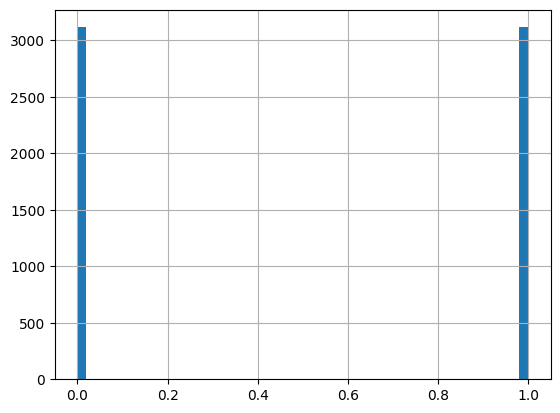

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

train_x, train_y = smote.fit_resample(train_x, train_y)

train_y.hist(bins=50) 

### Посмотрим на основе randomforest какие признаки вносят больший вклад в целевой признак

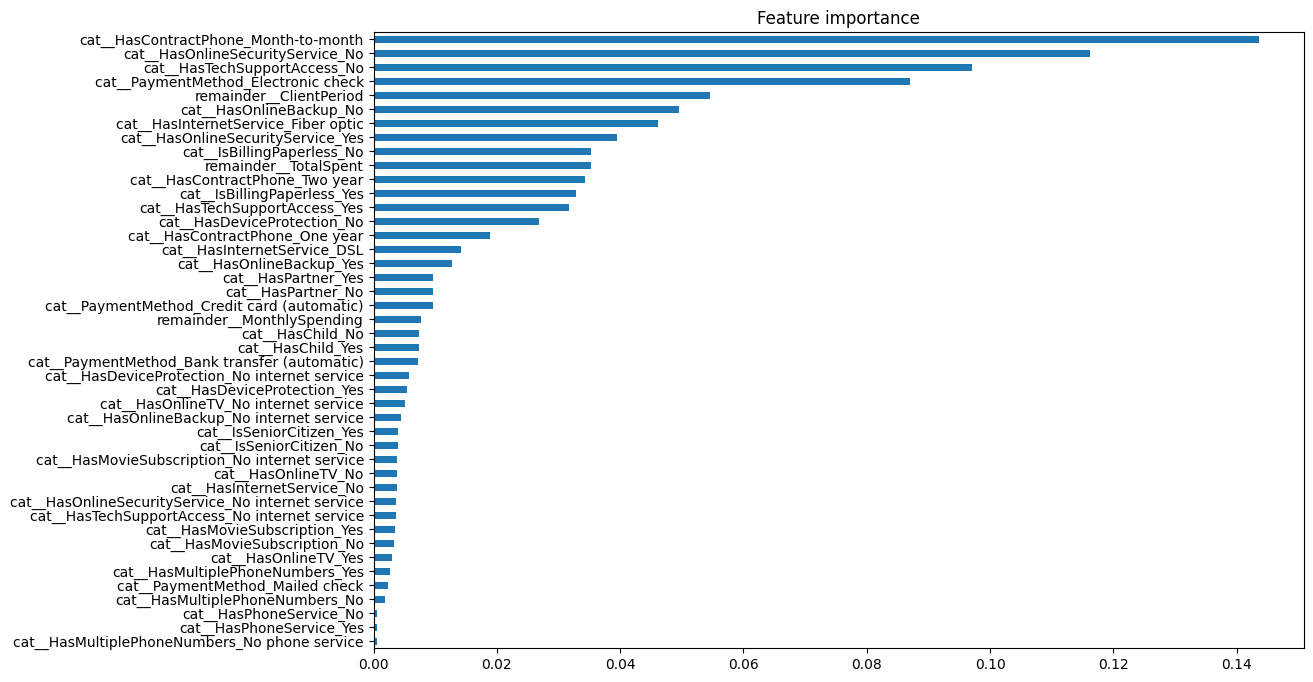

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=2000, min_impurity_decrease=0.001)
clf.fit(train_x, train_y)
pd.DataFrame(clf.feature_importances_, index=train_x.columns, columns=["importance"]) \
    .sort_values("importance") \
    .plot(kind="barh", legend=False, figsize=(12, 8));
plt.title("Feature importance");

# Обучение моделей
Обучать будем catboost, xgboost, logisticregression так как они показали наилучший результат в ноутбуке classif. Реализацию других моделей можно будет посмотреть там

### Логистическая регрессия

##### Обучение логистической регрессии

In [36]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from imblearn.pipeline import Pipeline as Pipeline_imb


# lr_pipe = Pipeline([
#     # ('preproc', columns_transformer),
#     ('model', LogisticRegression())
# ])

# # пространство гиперпараметров
# lr_params_grid = {
#     "model__C": [i/10 for i in range(1, 20)],
#     "model__penalty": ["l1"],
#     "model__solver": ["saga"],
#     "model__max_iter": [i for i in range(100, 1000, 100)]
# }

# lr_grid_search = GridSearchCV(
#     estimator=lr_pipe,
#     param_grid=lr_params_grid,
#     scoring="roc_auc",
#     n_jobs=-1,
#     cv=5,
#     refit=True
# )

# lr_model = lr_grid_search.fit(train_x, train_y)
# print("Лучшие параметры:", lr_grid_search.best_params_)


Лучшие параметры: {'model__C': 1.9, 'model__max_iter': 900, 'model__penalty': 'l1', 'model__solver': 'saga'}


D:\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [37]:
from sklearn.linear_model import LogisticRegression


lr_pipe = Pipeline([
    # ('preproc', columns_transformer),
    ('model', LogisticRegression(C=1.9, max_iter=900, penalty='l1', solver='saga', random_state=42))
])

lr_model = lr_pipe.fit(train_x, train_y)


D:\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [38]:
roc_auc_score(test_y, lr_model.predict(test_x))


0.6353220474156918

Как мы видим, при наборе параметров {'model__C': 1.9, 'model__max_iter': 900, 'model__penalty': 'l1', 'model__solver': 'saga'}

Результат 0.758

##### Матрица ошибок

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'true values')

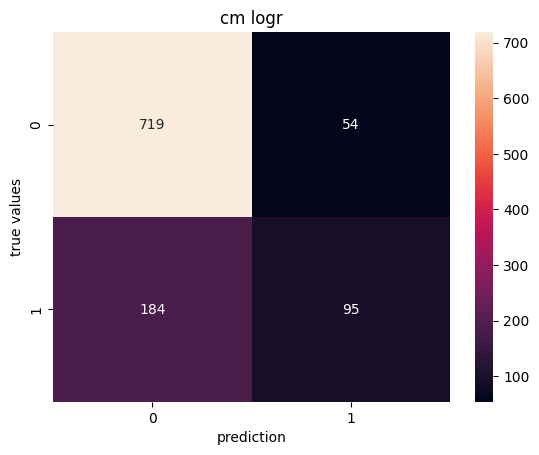

In [40]:
cm_lr = confusion_matrix(test_y ,lr_model.predict(test_x))
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title("cm logr")
plt.xlabel('prediction')
plt.ylabel('true values')

### CatBoost

##### Обучение catboost(использую random search или optuna)

In [41]:
# from catboost import CatBoostClassifier

# cat_features = train_x.select_dtypes(include=["object", "category"]).columns.tolist()

# cb_params_grid = {"depth": [i for i in range(2, 5)], 
#                         "l2_leaf_reg": [i/10 for i in range(1, 11, 2)], 
#                         "subsample": [i/10 for i in range(1, 11, 2)], 
#                         "n_estimators": [i for i in range(1, 500, 200)], 
#                         "learning_rate": [i/100 for i in range(1, 100, 20)], 
#                         'class_weights': [[1, i/10] for i in range(10, 30, 5)]  
#                        }

# cb_model = CatBoostClassifier(
#     cat_features=cat_features,
#     logging_level="Silent",
#     random_seed=42,
#     early_stopping_rounds=30,
#     eval_metric="AUC:hints=skip_train~false",
#     grow_policy="Lossguide"
#     )

# cb_model.grid_search(cb_params_grid, train_x, train_y, cv=3, plot=True, refit=True, verbose=True)

# # cb_pipe = Pipeline([
# #     ('preproc', columns_transformer),
# #     ('model', cb_model)
# # ])

# # cb_rand_search = RandomizedSearchCV(
# #     estimator=cb_pipe,
# #     param_distributions=cb_params_rand,
# #     n_iter=30,
# #     scoring='roc_auc',
# #     cv=5,
# #     n_jobs=-1,
# #     random_state=42,
# #     refit=True
# # )


# # cb_model = cb_rand_search.fit(train_x, train_y)
# # print("Лучшие параметры:", cb_rand_search.best_params_)

# print(f"  Лучший результат: {cb_model.best_score_['learn']}")
# print(f"  Лучший набор гиперпараметров: {cb_model.get_params()}")

In [42]:
# import optuna
# from optuna.integration import catboost as ocb
# from catboost import CatBoostClassifier

# def objective(trial):
#     lr = trial.suggest_float('lr', 0.01, 1)
#     itr = trial.suggest_int('itr', 1, 800)
#     dpt = trial.suggest_int('dpt', 2, 10)
    
#     cb_model = CatBoostClassifier(iterations=itr, learning_rate=lr, verbose=False, depth=dpt,
#                             eval_metric = 'AUC', early_stopping_rounds=30, thread_count=6)

#     cb_pipe = Pipeline([
#     # ('preproc', columns_transformer),
#     ('model', cb_model)
#     ])
    
#     cb_model = cb_pipe.fit(train_x, train_y)
    
#     return roc_auc_score(test_y, cb_model.predict(test_x))

# study = optuna.create_study(direction="maximize", pruner="Hyperband")
# study.optimize(objective, n_trials=300)

# print("Лучший ROC-AUC:", study.best_value)
# print("Лучшие параметры:", study.best_params)

[I 2025-07-13 03:52:48,712] A new study created in memory with name: no-name-cb981221-4d55-418b-b568-1ff9e834cb25
[I 2025-07-13 03:52:55,380] Trial 0 finished with value: 0.6849726661937153 and parameters: {'lr': 0.260657033421242, 'itr': 673, 'dpt': 6}. Best is trial 0 with value: 0.6849726661937153.
[I 2025-07-13 03:52:59,971] Trial 1 finished with value: 0.6822902901231992 and parameters: {'lr': 0.7730402514763113, 'itr': 686, 'dpt': 5}. Best is trial 0 with value: 0.6849726661937153.
[I 2025-07-13 03:53:58,559] Trial 2 finished with value: 0.6876133112622701 and parameters: {'lr': 0.29331995061728355, 'itr': 594, 'dpt': 10}. Best is trial 2 with value: 0.6876133112622701.
[I 2025-07-13 03:53:59,525] Trial 3 finished with value: 0.7176225384504815 and parameters: {'lr': 0.24230524484855195, 'itr': 167, 'dpt': 4}. Best is trial 3 with value: 0.7176225384504815.
[I 2025-07-13 03:53:59,921] Trial 4 finished with value: 0.7010483755048292 and parameters: {'lr': 0.5536615051850754, 'itr'

Лучший ROC-AUC: 0.759617836757594
Лучшие параметры: {'lr': 0.06067148370170983, 'itr': 21, 'dpt': 2}


In [43]:
from catboost import CatBoostClassifier

# cat_features = train_x.select_dtypes(include=["object", "category"]).columns.tolist()

cb_model = CatBoostClassifier(
    logging_level="Silent",
    iterations=21,
    depth=2,
    learning_rate=0.06,
    )


cb_pipe = Pipeline([
    # ('preproc', columns_transformer),
    ('model', cb_model)
])

cb_model = cb_pipe.fit(train_x, train_y)


In [44]:
roc_auc_score(test_y, cb_model.predict(test_x))

0.744930842456194

Лучший ROC-AUC: 0.759617836757594

Лучшие параметры: {'lr': 0.06067148370170983, 'itr': 21, 'dpt': 2}

##### Матрица ошибок

Text(50.722222222222214, 0.5, 'true values')

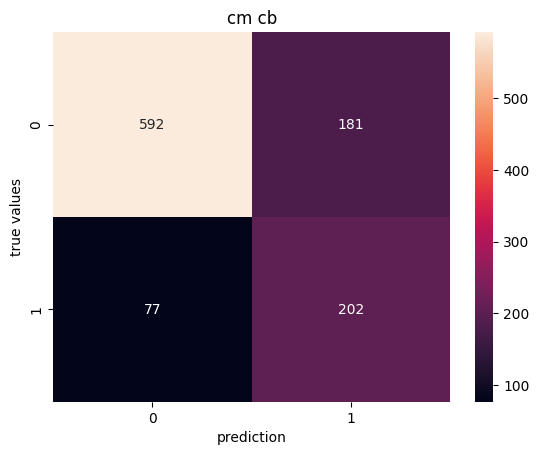

In [45]:
cm_cb = confusion_matrix(test_y ,cb_model.predict(test_x))
sns.heatmap(cm_cb, annot=True, fmt='d')
plt.title("cm cb")
plt.xlabel('prediction')
plt.ylabel('true values')

### XGBoost

Обучение XGBoost(используем optuna)

In [47]:
# import optuna
# from optuna.integration import xgboost as xgb
# from xgboost import XGBClassifier

# def objective(trial):
#     eta = trial.suggest_float('eta', 0.01, 1)
#     dpt = trial.suggest_int('dpt', 2, 5)
#     max_cat = trial.suggest_int('mcat', 1, 5)
#     n_est = trial.suggest_int('nest', 50, 400)
#     max_lvs = trial.suggest_int('mlvs', 1, 7)
#     #max_cat_threshold


#     # n_estimators : Optional[int]
#     #     Number of boosting rounds.

#     # max_depth :  typing.Optional[int]

#     #     Maximum tree depth for base learners.

#     # max_leaves : typing.Optional[int]

#     #     Maximum number of leaves; 0 indicates no limit.

#     # max_bin : typing.Optional[int]

#     #     If using histogram-based algorithm, maximum number of bins per feature


#     xgb = XGBClassifier(n_jobs=-1, eta=eta, n_estimators=n_est, max_leaves=max_lvs,
#                              max_cat_threshold=max_cat, max_depth=dpt)
#     xgb_pipe = Pipeline([
#     # ('preproc', columns_transformer),
#     ('model', xgb)
#     ])
    
    
#     xgb_model = xgb_pipe.fit(train_x, train_y)
#     return roc_auc_score(test_y, xgb_model.predict(test_x))
    
# #     cb = CatBoostClassifier(iterations=itr, learning_rate=lr, verbose=False, class_weights=[1, w1], depth=dpt,
# #                             eval_metric = 'AUC', early_stopping_rounds=30, thread_count=6)
    
# #     cb.fit(train_x_cb, train_y_cb, cat_features=cat_features)
    
# #     return roc_auc_score(test_y, cb.predict(test_x_cb))

# study = optuna.create_study(direction="maximize", pruner="Hyperband")
# study.optimize(objective, n_trials=500)

# print("Лучший ROC-AUC:", study.best_value)
# print("Лучшие параметры:", study.best_params)


[I 2025-07-13 03:59:02,536] A new study created in memory with name: no-name-207801d4-0809-4ac9-bcec-4857371cf032
[I 2025-07-13 03:59:02,962] Trial 0 finished with value: 0.7155336699634157 and parameters: {'eta': 0.4511754834727594, 'dpt': 5, 'mcat': 2, 'nest': 154, 'mlvs': 7}. Best is trial 0 with value: 0.7155336699634157.
[I 2025-07-13 03:59:03,043] Trial 1 finished with value: 0.700751621713104 and parameters: {'eta': 0.9889746024803049, 'dpt': 2, 'mcat': 4, 'nest': 59, 'mlvs': 4}. Best is trial 0 with value: 0.7155336699634157.
[I 2025-07-13 03:59:03,287] Trial 2 finished with value: 0.7227021287447779 and parameters: {'eta': 0.7370882810580937, 'dpt': 2, 'mcat': 4, 'nest': 368, 'mlvs': 2}. Best is trial 2 with value: 0.7227021287447779.
[I 2025-07-13 03:59:03,350] Trial 3 finished with value: 0.7415251290183477 and parameters: {'eta': 0.6828067737952188, 'dpt': 2, 'mcat': 1, 'nest': 64, 'mlvs': 2}. Best is trial 3 with value: 0.7415251290183477.
[I 2025-07-13 03:59:03,640] Trial

Лучший ROC-AUC: 0.763753842729764
Лучшие параметры: {'eta': 0.0311931558994121, 'dpt': 3, 'mcat': 5, 'nest': 127, 'mlvs': 2}


In [48]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_jobs=-1,
    eta=0.031,
    max_depth=3,
    eval_metric='auc',
    # scale_pos_weight=1.9,      
    random_state=42,
    n_estimators=127,
    max_cat_threshold=5,
    max_leaves=2
)

xgb_pipe = Pipeline([
    # ('preproc', columns_transformer),
    ('model', xgb)
    ])
    
    
xgb_model = xgb_pipe.fit(train_x, train_y)





In [49]:
roc_auc_score(test_y, xgb_model.predict(test_x))

0.7631070121993629

Лучший ROC-AUC: 0.763753842729764

Лучшие параметры: {'eta': 0.0311931558994121, 'dpt': 3, 'mcat': 5, 'nest': 127, 'mlvs': 2}

### Матрица ошибок

Text(50.722222222222214, 0.5, 'true values')

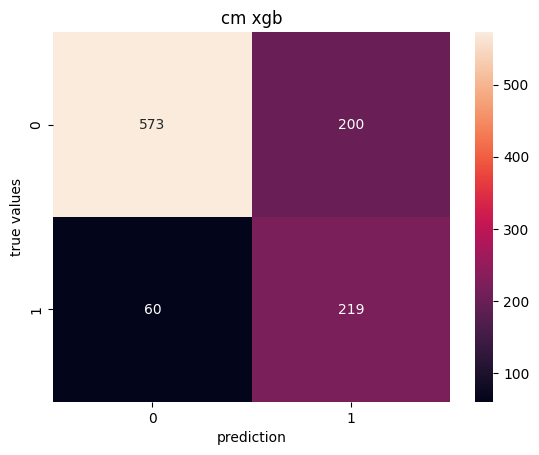

In [50]:
cm_xgb = confusion_matrix(test_y ,xgb_model.predict(test_x))
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title("cm xgb")
plt.xlabel('prediction')
plt.ylabel('true values')

# Обработка результатов для отправки

### Линейная регрессия

In [ ]:
lr_commit_predict = lr_model.predict(commit)

submission = pd.DataFrame({"Id": commit.index,
                          'Churn':lr_commit_predict})
submission.to_csv('submission_logr.csv', index=False)

### CatBoost

In [ ]:

cb_commit_predict = cb_model.predict(commit)

submission = pd.DataFrame({"Id": commit.index,
                          'Churn':cb_commit_predict})
submission.to_csv('submission_cb.csv', index=False)

### XGBoost

In [51]:
xgb_commit_predict = xgb_model.predict(commit)

submission = pd.DataFrame({"Id": commit.index,
                          'Churn':xgb_commit_predict})
submission.to_csv('submission_xgb.csv', index=False)